In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("F:/Python DS/db/BreastCancer.csv")
df

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [3]:
dum_df = pd.get_dummies(df)

dum_df


,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Benign,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,1,0
1,63375,9,1,2,6,4,10,7,7,2,0,1
2,76389,10,4,7,2,2,8,6,1,1,0,1
3,95719,6,10,10,10,8,10,7,10,7,0,1
4,128059,1,1,1,1,2,5,5,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,0,1
695,1371026,5,10,10,10,4,10,5,6,3,0,1
696,1371920,5,1,1,1,2,1,3,2,1,1,0
697,8233704,4,1,1,1,1,1,2,1,1,1,0


In [4]:
dum_df = dum_df.drop('Code', axis=1)
dum_df = dum_df.drop('Class_Benign', axis=1)

dum_df

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,5,4,3,1,2,2,2,3,1,0
1,9,1,2,6,4,10,7,7,2,1
2,10,4,7,2,2,8,6,1,1,1
3,6,10,10,10,8,10,7,10,7,1
4,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,10,10,10,10,5,10,10,10,7,1
695,5,10,10,10,4,10,5,6,3,1
696,5,1,1,1,2,1,3,2,1,0
697,4,1,1,1,1,1,2,1,1,0


In [5]:
X = dum_df.iloc[:,0:9]
y = dum_df.iloc[:,9]

print(y.value_counts())
pd.crosstab(index=y,columns='Prop',normalize='all')


0    458
1    241
Name: Class_Malignant, dtype: int64


col_0,Prop
Class_Malignant,
0,0.655222
1,0.344778


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2020,
                                                    stratify=y)


In [7]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,3,5,7,9,11,13,15]}
                                                   
knn = KNeighborsClassifier()
model = GridSearchCV(knn,parameters)

model.fit( X_train , y_train )

model.best_params_

{'n_neighbors': 3}

In [8]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)


cv = GridSearchCV(knn, param_grid=parameters,cv=kfold)
cv.fit( X , y )


print(cv.best_params_)

print(cv.best_score_)

{'n_neighbors': 15}
0.9685714285714286


In [9]:
                                                    
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))


[[133   5]
 [  3  69]]


In [10]:

print(accuracy_score(y_test, y_pred))


0.9619047619047619


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       138
           1       0.93      0.96      0.95        72

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210



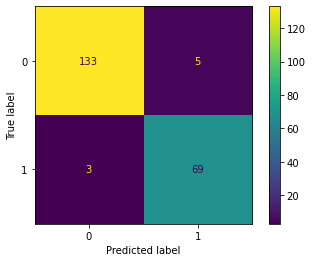

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=[0,1])
plt.show()


In [13]:

from sklearn.metrics import roc_curve, roc_auc_score

In [14]:

y_pred_prob = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

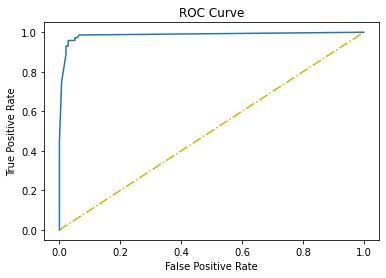

In [15]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'y-.')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [16]:

roc_auc_score(y_test, y_pred_prob)

0.9862117552334944